In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
prison = pd.read_json("PRISON.json")
prison.head()

,CountryCode,Description,IndicatorCode,Unit,Value,WPB Rate,Year
0,DMA,"Prison population rate per 100,000 of the nati...",PRISON,"People per 100,000",315.466671,307,2001
1,DMA,"Prison population rate per 100,000 of the nati...",PRISON,"People per 100,000",326.682488,319,2002
2,DMA,"Prison population rate per 100,000 of the nati...",PRISON,"People per 100,000",422.900808,414,2004
3,DMA,"Prison population rate per 100,000 of the nati...",PRISON,"People per 100,000",437.869134,424,2006
4,DMA,"Prison population rate per 100,000 of the nati...",PRISON,"People per 100,000",341.659155,331,2008


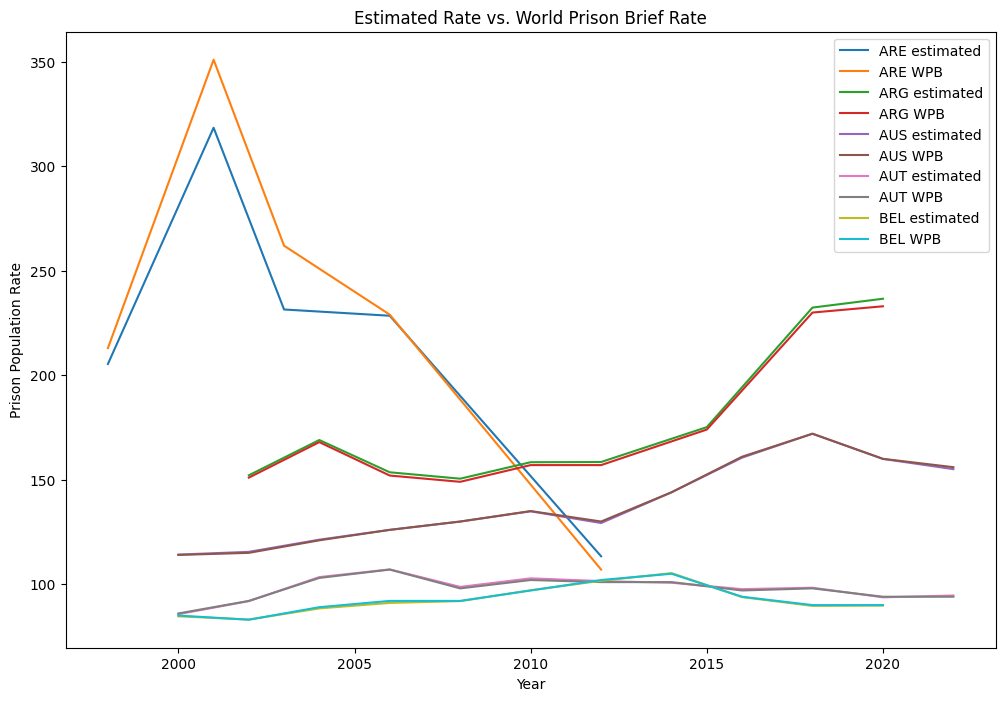

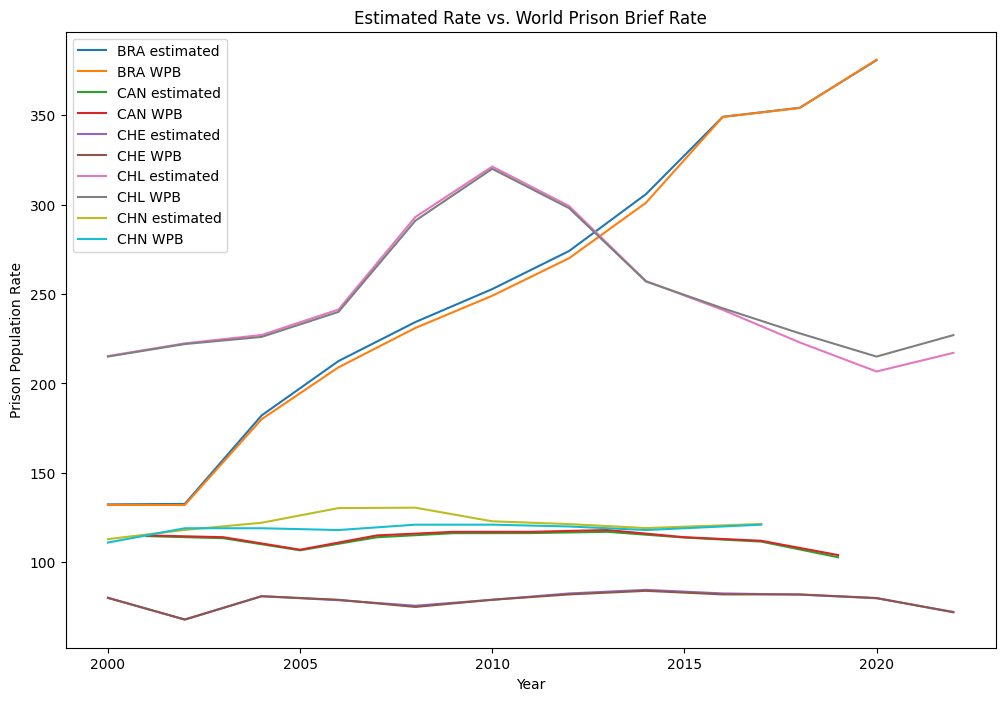

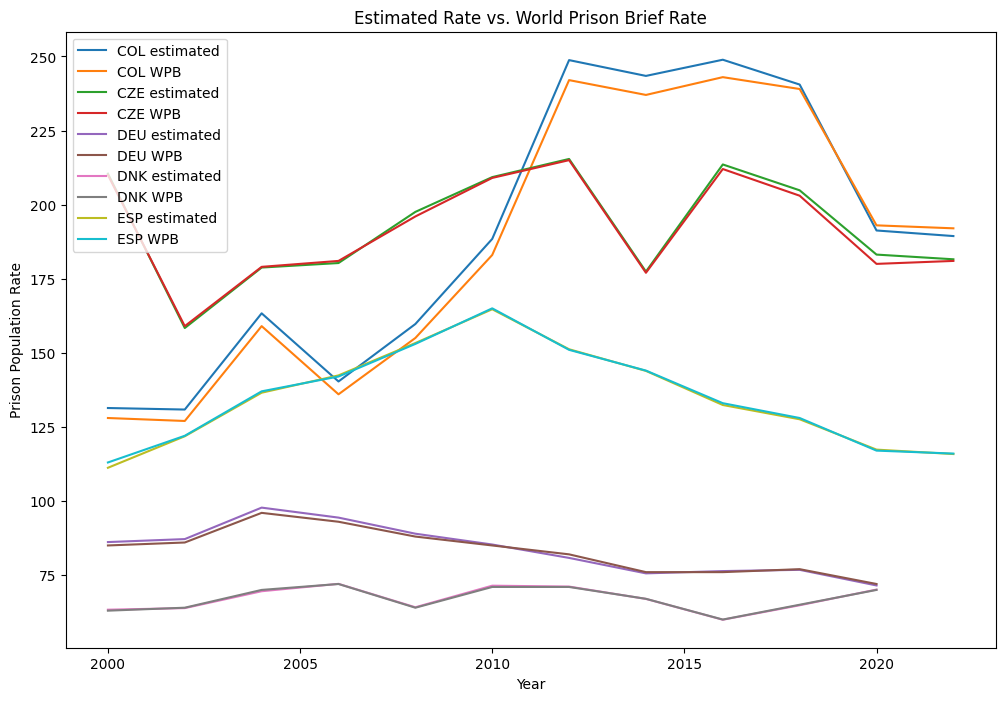

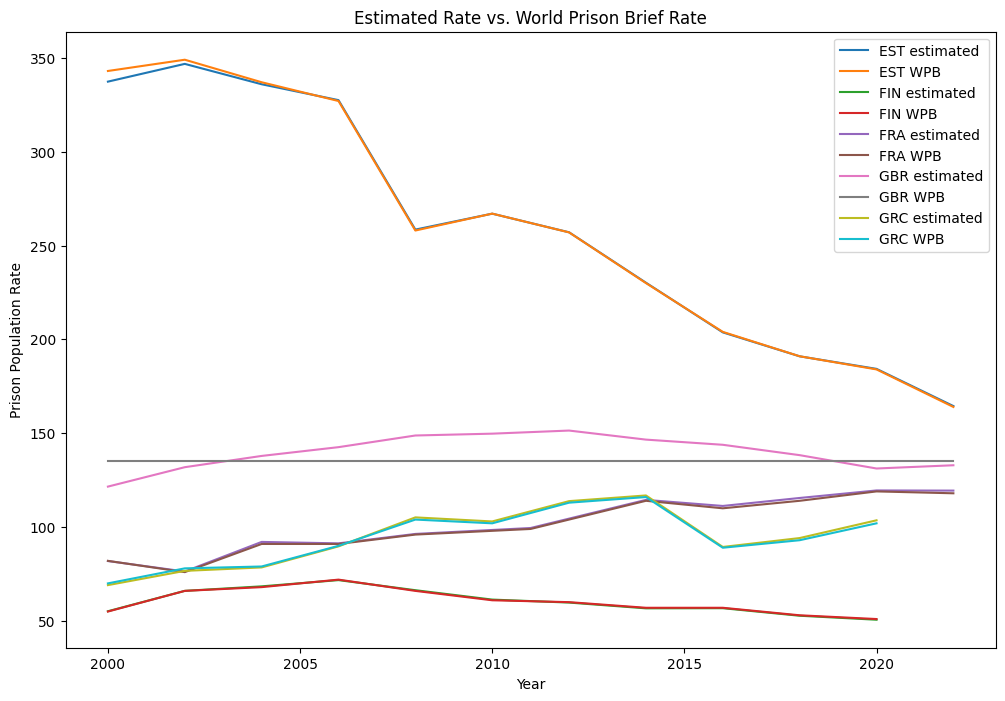

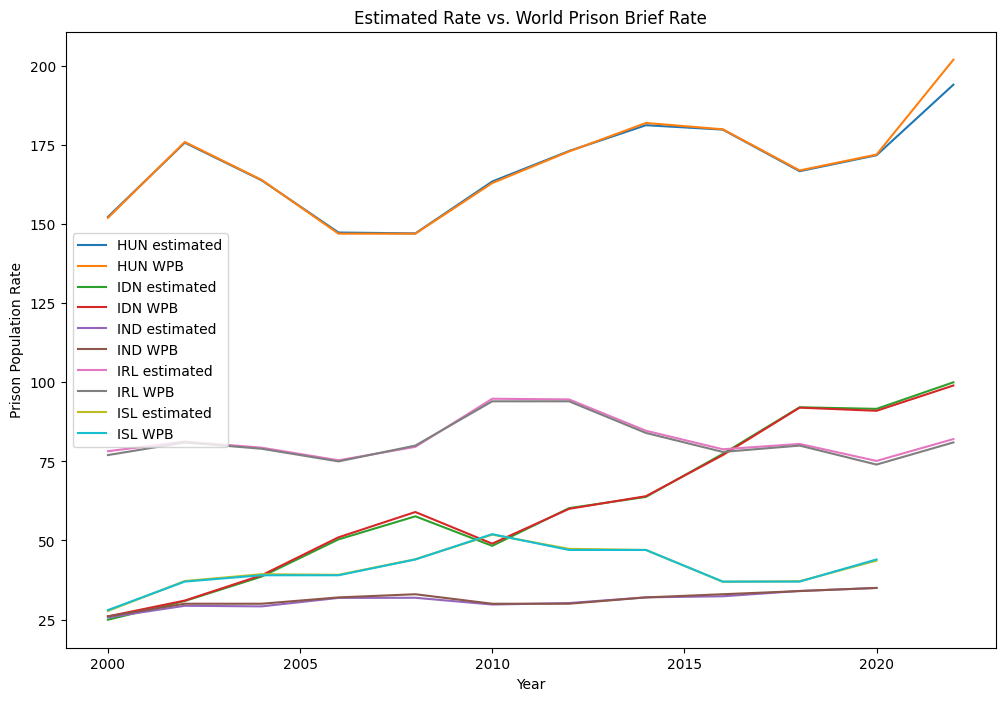

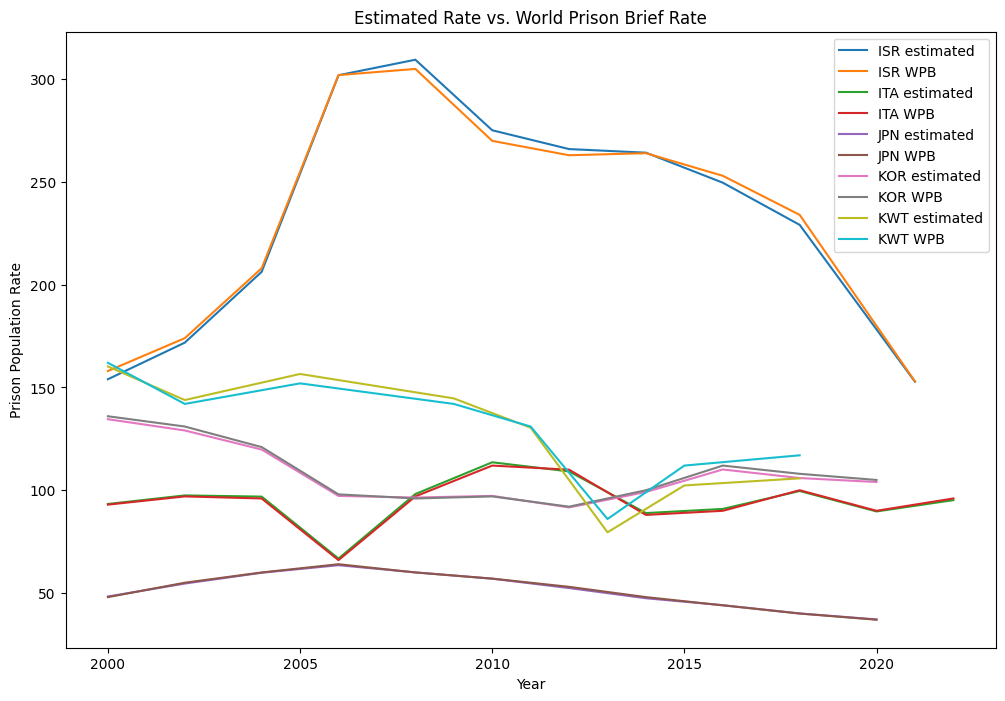

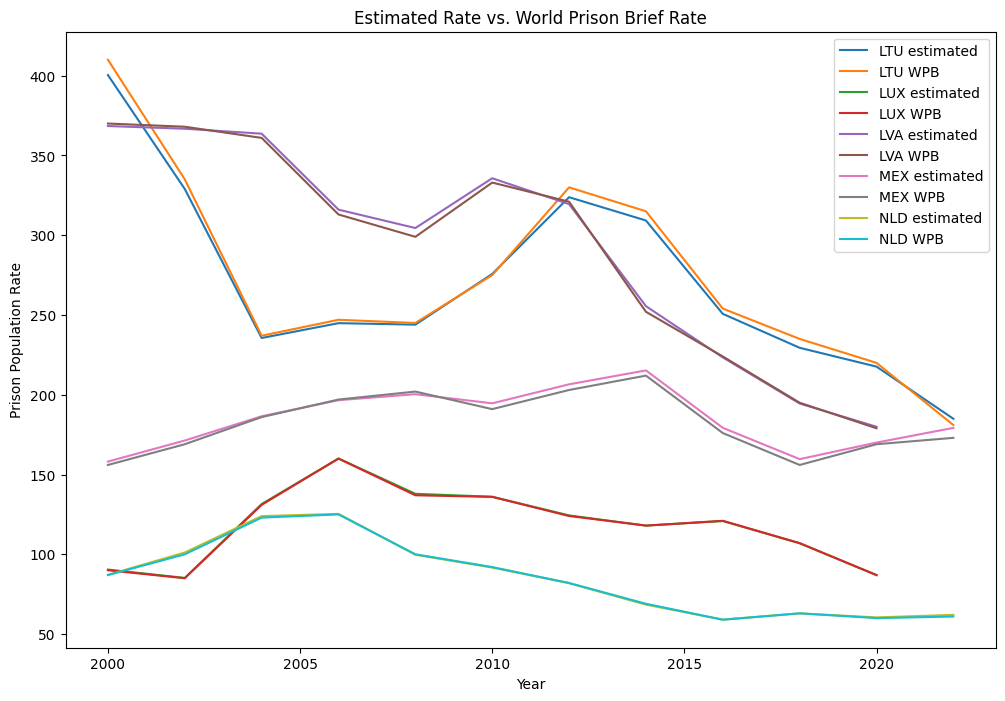

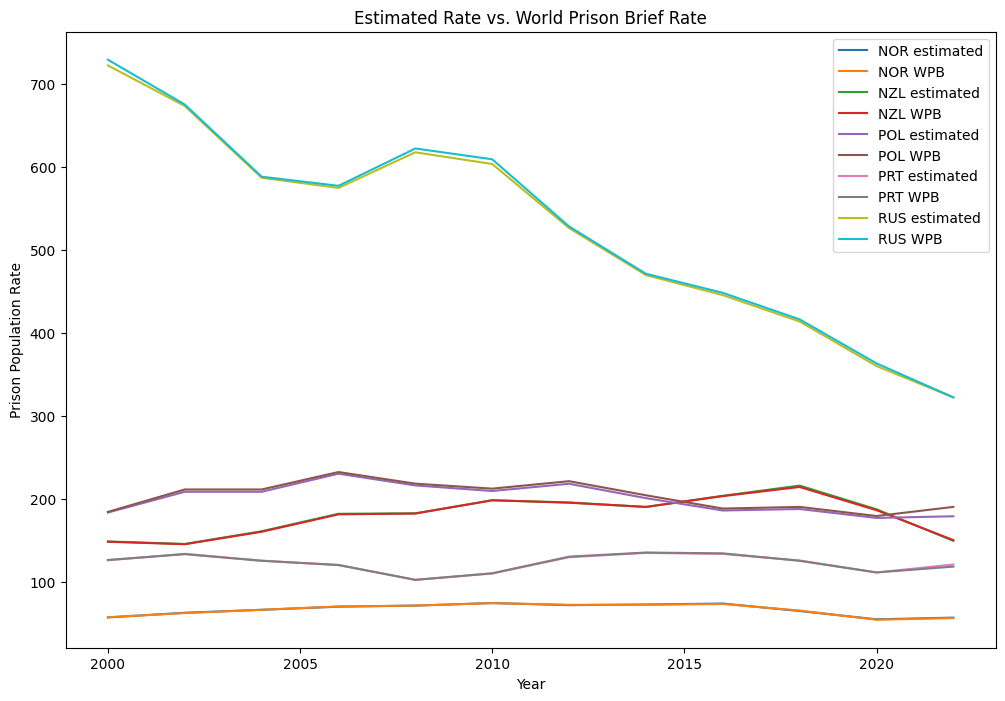

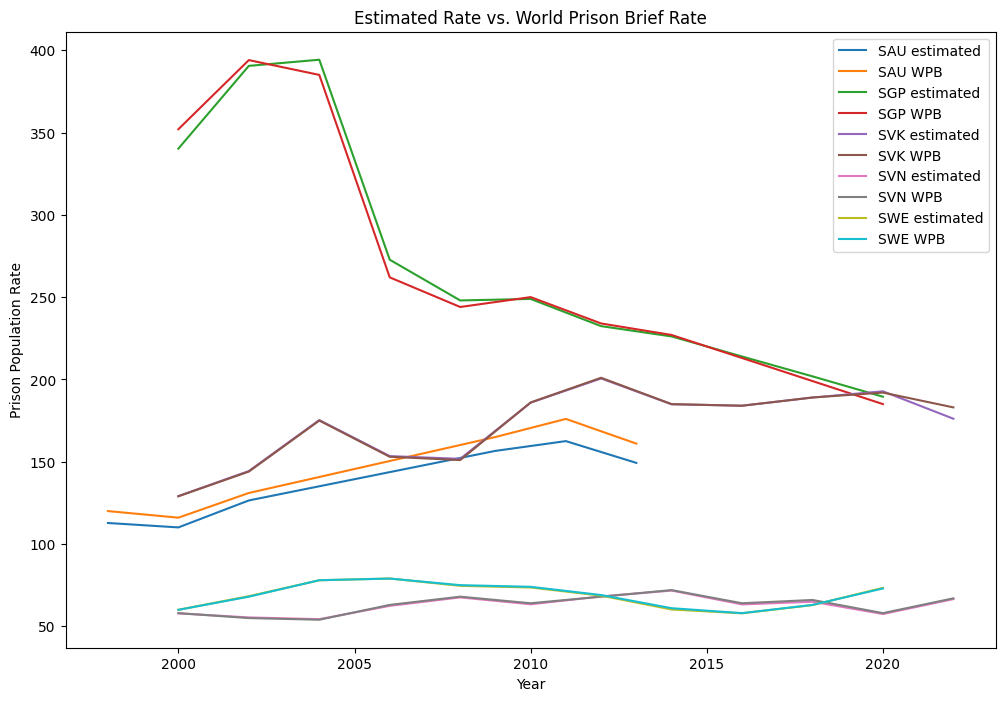

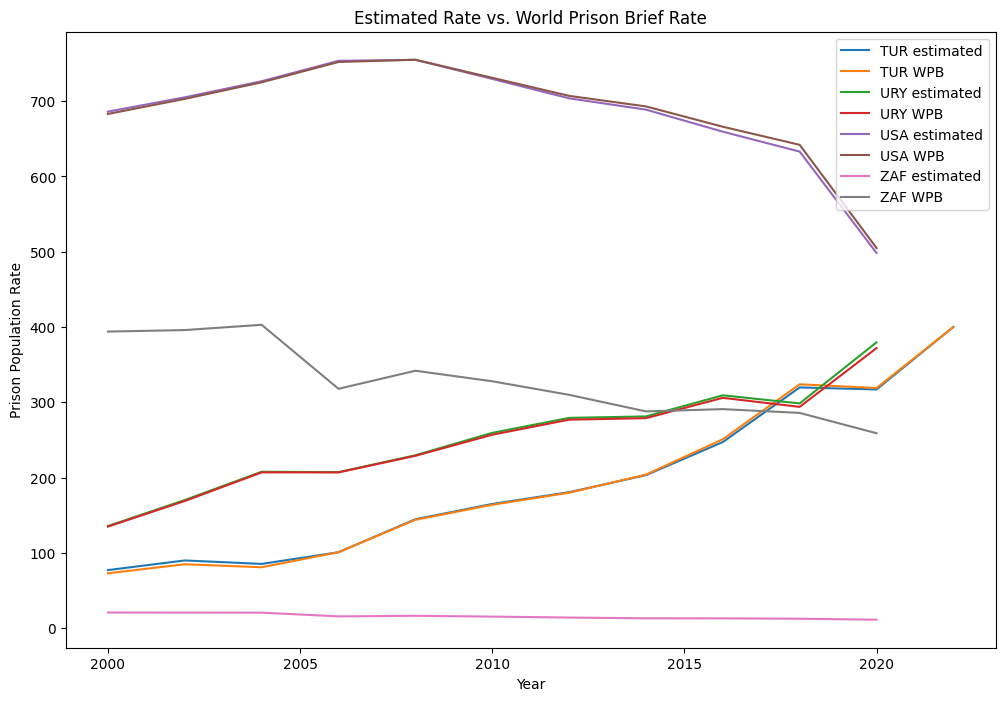

In [29]:
sspi_49 = ['Argentina', 'Australia', 'Austria', 'Belgium','Brazil','Canada','Chile','China','Colombia','Czechia',
    'Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Iceland','India','Indonesia','Ireland','Israel','Italy','Japan',
    'Korea, Republic of','Kuwait','Latvia','Lithuania','Luxembourg','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Russian Federation',
    'Saudi Arabia','Singapore','Slovakia','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Arab Emirates',
    'United Kingdom','United States','Uruguay']
codes = [pycountry.countries.search_fuzzy(cou)[0].alpha_3 for cou in sspi_49]
prison_filtered = prison[prison["CountryCode"].isin(codes)]
plt.figure(figsize=(12, 8))
count = 0
for country, grouped in prison_filtered.groupby("CountryCode"):
    if count == 5:
        plt.figure(figsize=(12, 8))
        count = 0
    plt.plot(grouped["Year"], grouped["Value"], label = f"{country} estimated")
    plt.plot(grouped["Year"], grouped["WPB Rate"], label = f"{country} WPB")
    plt.legend()
    plt.ylabel("Prison Population Rate")
    plt.xlabel("Year")
    plt.title("Estimated Rate vs. World Prison Brief Rate")
    count += 1
